In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
import requests
from io import BytesIO

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
df = pd.read_csv("10kmovies (1).csv")
df.head()

,Title,Poster,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,The Super Mario Bros. Movie,https://image.tmdb.org/t/p/w500//qNBAXBIQlnOTh...,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Creed III,https://image.tmdb.org/t/p/w500//cvsXj3I9Q2iyy...,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Avatar: The Way of Water,https://image.tmdb.org/t/p/w500//t6HIqrRAclMCA...,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Murder Mystery 2,https://image.tmdb.org/t/p/w500//s1VzVhXlqsevi...,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Shazam! Fury of the Gods,https://image.tmdb.org/t/p/w500//A3ZbZsmsvNGdp...,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
def getImage(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

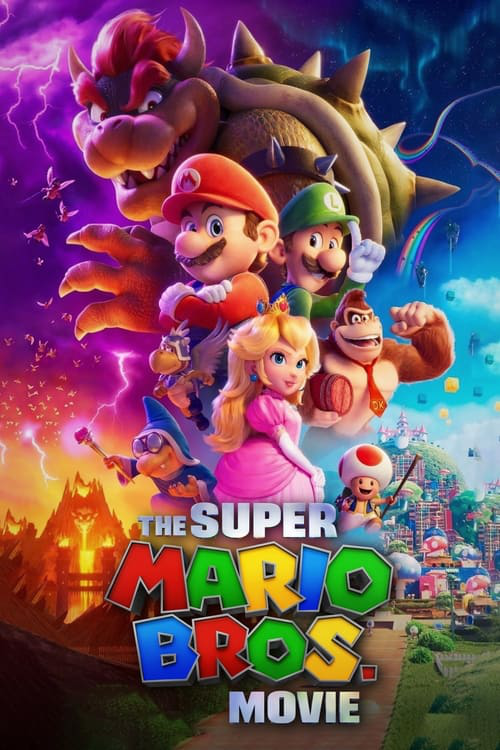

In [5]:
ex = getImage("https://image.tmdb.org/t/p/w500//qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg")
ex

In [6]:
getImage("https://image.tmdb.org/t/p/w500//qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg").size

(500, 750)

# Data cleaning

In [7]:
n = 0
for i in df.loc[:,"Poster"]:
    n += 1
    print(i)
    if str(i) == "https://image.tmdb.org/t/p/w500/None":
        df = df.drop(n)

https://image.tmdb.org/t/p/w500//qNBAXBIQlnOThrVvA6mA2B5ggV6.jpg
https://image.tmdb.org/t/p/w500//cvsXj3I9Q2iyyIo95AecSd1tad7.jpg
https://image.tmdb.org/t/p/w500//t6HIqrRAclMCA60NsSmeqe9RmNV.jpg
https://image.tmdb.org/t/p/w500//s1VzVhXlqsevi8zeCMG9A16nEUf.jpg
https://image.tmdb.org/t/p/w500//A3ZbZsmsvNGdprRi2lKgGEeVLEH.jpg
https://image.tmdb.org/t/p/w500//gOnmaxHo0412UVr1QM5Nekv1xPi.jpg
https://image.tmdb.org/t/p/w500//rzRb63TldOKdKydCvWJM8B6EkPM.jpg
https://image.tmdb.org/t/p/w500//kuf6dutpsT0vSVehic3EZIqkOBt.jpg
https://image.tmdb.org/t/p/w500//vZloFAK7NmvMGKE7VkF5UHaz0I.jpg
https://image.tmdb.org/t/p/w500//9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg
https://image.tmdb.org/t/p/w500//qVdrYN8qu7xUtsdEFeGiIVIaYd.jpg
https://image.tmdb.org/t/p/w500//d07xtqwq1uriQ1hda6qeu8Skt5m.jpg
https://image.tmdb.org/t/p/w500//fNTtVbqI92abEKAgz2ynurCUne.jpg
https://image.tmdb.org/t/p/w500//hR1jdCw0A9czgsbp45TASkjjBhA.jpg
https://image.tmdb.org/t/p/w500//gbGHezV6yrhua0KfAgwrknSOiIY.jpg
https://image.tmdb.org/t/p/w

In [8]:
df

,Title,Poster,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,The Super Mario Bros. Movie,https://image.tmdb.org/t/p/w500//qNBAXBIQlnOTh...,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Creed III,https://image.tmdb.org/t/p/w500//cvsXj3I9Q2iyy...,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Avatar: The Way of Water,https://image.tmdb.org/t/p/w500//t6HIqrRAclMCA...,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Murder Mystery 2,https://image.tmdb.org/t/p/w500//s1VzVhXlqsevi...,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Shazam! Fury of the Gods,https://image.tmdb.org/t/p/w500//A3ZbZsmsvNGdp...,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10035,I Give It a Year,https://image.tmdb.org/t/p/w500//hCSqxrM5Sw6Ah...,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10036,One Missed Call,https://image.tmdb.org/t/p/w500//9pIvQaQV0sMHx...,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
10037,Full of Grace,https://image.tmdb.org/t/p/w500//hPz9EByDWOqcN...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10038,Dave,https://image.tmdb.org/t/p/w500//wIUuf1NFchdCJ...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
len(df)

10025

# Data preproccesing

In [10]:
def resizeImage(image):
    resized_image = image.resize((200,200))
    return resized_image

In [11]:
def normalizeImage(image):
    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Convert the image array to floating-point format
    image_array = image_array.astype(np.float32)

    # Scale the pixel values to [0, 1]
    image_array /= 255.0

    return image_array

normalized_image = normalizeImage(ex)
normalized_image

array([[[0.74509805, 0.37254903, 0.7019608 ],
        [0.7921569 , 0.42352942, 0.7529412 ],
        [0.85882354, 0.50980395, 0.83137256],
        ...,
        [0.01960784, 0.20784314, 0.39607844],
        [0.02352941, 0.21176471, 0.4       ],
        [0.02745098, 0.21568628, 0.40392157]],

       [[0.7294118 , 0.34117648, 0.69411767],
        [0.76862746, 0.4       , 0.74509805],
        [0.84705883, 0.49803922, 0.827451  ],
        ...,
        [0.01960784, 0.20784314, 0.39607844],
        [0.01960784, 0.20784314, 0.39607844],
        [0.02352941, 0.21176471, 0.4       ]],

       [[0.7137255 , 0.32156864, 0.69803923],
        [0.7490196 , 0.36862746, 0.7411765 ],
        [0.8352941 , 0.47058824, 0.827451  ],
        ...,
        [0.01960784, 0.2       , 0.39215687],
        [0.02352941, 0.20392157, 0.39607844],
        [0.02745098, 0.20784314, 0.4       ]],

       ...,

       [[0.05098039, 0.00392157, 0.00392157],
        [0.05098039, 0.00392157, 0.00392157],
        [0.05490196, 0

In [12]:
#def normalizeImage(image):
#    image = image.astype(np.float32)
#    image /= 255.0
#    return image

In [13]:
def transformingImage(image):
    transforemedImage = normalizeImage(resizeImage(getImage(image)))
    return transforemedImage

In [14]:
transformingImage("https://image.tmdb.org/t/p/w500//qNz4l8UgTkD8rlqiKZ556pCJ9iO.jpg")

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.28627452, 0.35686275, 0.4       ],
        [0.25490198, 0.31764707, 0.35686275],
        [0.1254902 , 0

In [15]:
df.insert(2, "ArrayImage", "")

In [16]:
df

,Title,Poster,ArrayImage,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,The Super Mario Bros. Movie,https://image.tmdb.org/t/p/w500//qNBAXBIQlnOTh...,,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Creed III,https://image.tmdb.org/t/p/w500//cvsXj3I9Q2iyy...,,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Avatar: The Way of Water,https://image.tmdb.org/t/p/w500//t6HIqrRAclMCA...,,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Murder Mystery 2,https://image.tmdb.org/t/p/w500//s1VzVhXlqsevi...,,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Shazam! Fury of the Gods,https://image.tmdb.org/t/p/w500//A3ZbZsmsvNGdp...,,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10035,I Give It a Year,https://image.tmdb.org/t/p/w500//hCSqxrM5Sw6Ah...,,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10036,One Missed Call,https://image.tmdb.org/t/p/w500//9pIvQaQV0sMHx...,,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
10037,Full of Grace,https://image.tmdb.org/t/p/w500//hPz9EByDWOqcN...,,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10038,Dave,https://image.tmdb.org/t/p/w500//wIUuf1NFchdCJ...,,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df = df.drop(df.index[30:]) #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

In [18]:
for index, row in df.iterrows():
    image_url = row['Poster']
    transformed_image = transformingImage(image_url)
    df.at[index, 'ArrayImage'] = transformed_image

In [19]:
df.head()

,Title,Poster,ArrayImage,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,The Super Mario Bros. Movie,https://image.tmdb.org/t/p/w500//qNBAXBIQlnOTh...,"[[[0.76862746, 0.39215687, 0.7529412], [0.8352...",0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Creed III,https://image.tmdb.org/t/p/w500//cvsXj3I9Q2iyy...,"[[[0.29803923, 0.42745098, 0.49411765], [0.298...",1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Avatar: The Way of Water,https://image.tmdb.org/t/p/w500//t6HIqrRAclMCA...,"[[[0.03529412, 0.03137255, 0.05490196], [0.035...",1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,Murder Mystery 2,https://image.tmdb.org/t/p/w500//s1VzVhXlqsevi...,"[[[0.627451, 0.6901961, 0.84705883], [0.611764...",1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Shazam! Fury of the Gods,https://image.tmdb.org/t/p/w500//A3ZbZsmsvNGdp...,"[[[0.02745098, 0.02745098, 0.011764706], [0.03...",1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dfFinal = df.iloc[:, :3]
dfFinal = dfFinal.drop("Title", axis = 1)
dfFinal

,Poster,ArrayImage
0,https://image.tmdb.org/t/p/w500//qNBAXBIQlnOTh...,"[[[0.76862746, 0.39215687, 0.7529412], [0.8352..."
1,https://image.tmdb.org/t/p/w500//cvsXj3I9Q2iyy...,"[[[0.29803923, 0.42745098, 0.49411765], [0.298..."
2,https://image.tmdb.org/t/p/w500//t6HIqrRAclMCA...,"[[[0.03529412, 0.03137255, 0.05490196], [0.035..."
3,https://image.tmdb.org/t/p/w500//s1VzVhXlqsevi...,"[[[0.627451, 0.6901961, 0.84705883], [0.611764..."
4,https://image.tmdb.org/t/p/w500//A3ZbZsmsvNGdp...,"[[[0.02745098, 0.02745098, 0.011764706], [0.03..."
5,https://image.tmdb.org/t/p/w500//gOnmaxHo0412U...,"[[[0.043137256, 0.023529412, 0.011764706], [0...."
6,https://image.tmdb.org/t/p/w500//rzRb63TldOKdK...,"[[[0.007843138, 0.019607844, 0.078431375], [0...."
7,https://image.tmdb.org/t/p/w500//kuf6dutpsT0vS...,"[[[0.003921569, 0.003921569, 0.011764706], [0...."
8,https://image.tmdb.org/t/p/w500//vZloFAK7NmvMG...,"[[[0.11372549, 0.1254902, 0.16470589], [0.1137..."
9,https://image.tmdb.org/t/p/w500//9JBEPLTPSm0d1...,"[[[0.047058824, 0.007843138, 0.003921569], [0...."


In [22]:
dfFinal = dfFinal.drop("Poster", axis = 1)

In [23]:
dfFinal["Genre"] = ""
dfFinal.head()

,ArrayImage,Genre
0,"[[[0.76862746, 0.39215687, 0.7529412], [0.8352...",
1,"[[[0.29803923, 0.42745098, 0.49411765], [0.298...",
2,"[[[0.03529412, 0.03137255, 0.05490196], [0.035...",
3,"[[[0.627451, 0.6901961, 0.84705883], [0.611764...",
4,"[[[0.02745098, 0.02745098, 0.011764706], [0.03...",


In [24]:
df = df.drop("Title", axis = 1)
df = df.drop("Poster", axis = 1)
df.head()

,ArrayImage,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,"[[[0.76862746, 0.39215687, 0.7529412], [0.8352...",0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,"[[[0.29803923, 0.42745098, 0.49411765], [0.298...",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,"[[[0.03529412, 0.03137255, 0.05490196], [0.035...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,"[[[0.627451, 0.6901961, 0.84705883], [0.611764...",1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,"[[[0.02745098, 0.02745098, 0.011764706], [0.03...",1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
def newGenre(lista):
    gatunki = ""
    for i in lista:
        gatunki = gatunki + i + "_"
    gatunki = gatunki[:-1]
    return gatunki

In [27]:
df = df.drop("ArrayImage", axis = 1)
df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [28]:
for index, row in df.iterrows():
    gatunek = []
    j=-1
    for i in row:
        j += 1
        if i == 1:
            gatunek.append(df.columns[j]) 
            
    dfFinal.at[index, "Genre"] = newGenre(gatunek)


In [29]:
dfFinal.head()

,ArrayImage,Genre
0,"[[[0.76862746, 0.39215687, 0.7529412], [0.8352...",Adventure_Animation_Comedy_Family_Fantasy
1,"[[[0.29803923, 0.42745098, 0.49411765], [0.298...",Action_Drama
2,"[[[0.03529412, 0.03137255, 0.05490196], [0.035...",Action_Adventure_Science Fiction
3,"[[[0.627451, 0.6901961, 0.84705883], [0.611764...",Action_Comedy_Mystery
4,"[[[0.02745098, 0.02745098, 0.011764706], [0.03...",Action_Comedy_Fantasy


In [30]:
X = dfFinal["ArrayImage"]
y = dfFinal["Genre"]


# Work needed below

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = tf.convert_to_tensor(X_train)
y_train_tensor = tf.convert_to_tensor(y_train)
X_val_tensor = tf.convert_to_tensor(X_val)
y_val_tensor = tf.convert_to_tensor(y_val)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# ... Continue defining the rest of the model architecture

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=32, validation_data=(X_val_tensor, y_val_tensor))

